In [27]:
# importing libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


# Strategy 

1. Split the training data into two datasets, one as real_train and one as test_train
2. Train different model using the real_train and test the model on the test_train dataset
3. After obtaining the best model, retrain the best model on the full real_train dataset
4. Use the final model to test on the test_final

# Reading in Data

In [28]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
print(train_data.info())
print(train_data.describe())
print(train_data.columns)
print(train_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## Splitting of the training dataset

In [30]:
real_train = train_data.sample(n=600)
test_train = train_data.sample(n=200)

print("Dataset split")
print("real_train shape: ",real_train.shape," | test_train shape: ",test_train.shape)

Dataset split
real_train shape:  (600, 12)  | test_train shape:  (200, 12)


## Doing analysis on the real_train dataset

In [31]:
real_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S


# Data Analysis
Several factors to explore:
1. Do Gender affect Survival Rate? 
2. Do PClass affect Survival Rate? (PClass is a pseducategory in Titanic Dataset, use to represent the social classes)
3. Do Age affect Survival Rate? 
4. Do SibSp affect Survival Rate? 
5. Do Parch affect Survival Rate? 

Random (or fun) analysis:
1. Do the fare paid by the people reflect their PClass? 

## Gender Affect Survival Rate?

In [32]:
total_male = real_train[real_train.Sex == "male"]
survived_male = total_male[total_male.Survived == 1]

total_female = real_train[real_train.Sex == "female"]
survived_female = total_female[total_female.Survived == 1]

print("Survived Male Rate = ",len(survived_male)/len(total_male), " | Survivied Female Rate = ",len(survived_female)/len(total_female))

Survived Male Rate =  0.19170984455958548  | Survivied Female Rate =  0.7336448598130841


We can see from the analysis is that IN GENERAL, Female has higher survival rate compare to Male. But after doing some research, it is found out that it is actually depends on the captain, whether he or she ordered for WCF (Woman and Children First), as shown in [THIS](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3421183/) research paper, so I think that the captain on the Titanic order for WCF!

PS: You can scroll all the way down to the Result and Discussion to read the final result. 

Text(0.5, 1.0, 'Survival Count of different Sex')

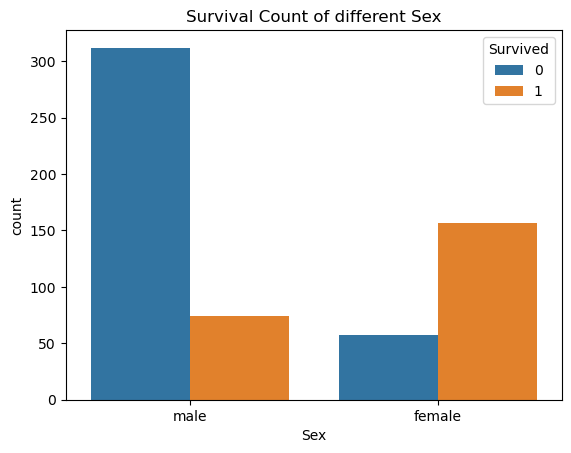

In [33]:
sns.countplot(data = real_train, x = "Sex",hue = "Survived").set_title("Survival Count of different Sex")

## Pclass affect Survival Rate?

<Axes: xlabel='Pclass', ylabel='count'>

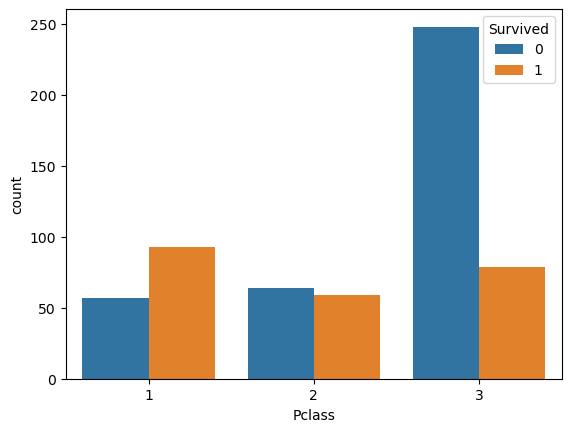

In [34]:
sns.countplot(data = real_train, x = "Pclass" , hue = "Survived")

Higher Pclass does have an effect on their survival rate. (Higher PClass, means that they have lower socioeconomy status). 

<Axes: xlabel='Pclass', ylabel='Fare'>

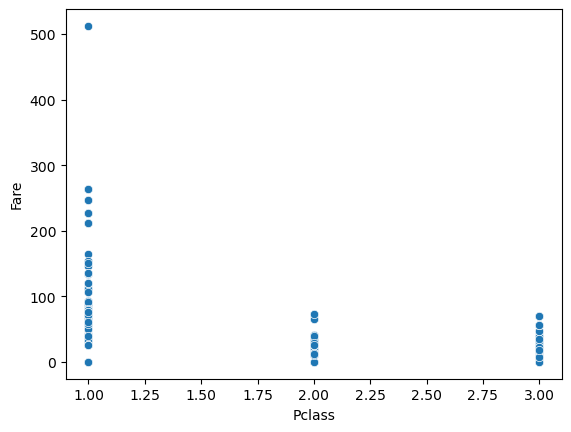

In [35]:
sns.scatterplot(data = real_train , x = "Pclass", y = "Fare")

In [36]:
Social_Class = real_train.groupby(["Pclass"])
Social_Class.describe()["Fare"]

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,150.0,79.897221,67.320222,0.0,31.000,66.6000,90.8094,512.3292
2,123.0,21.290007,14.363629,0.0,13.000,15.0458,26.0000,73.5000
3,327.0,14.167008,12.274320,0.0,7.775,8.0500,15.8750,69.5500


As view in the table above, it can be seen that the higher the fare paid by an individual, the lower the Pclass of an individual. PROBABLY

## Age Affect Survival Rate? 

In [43]:
real_train["Age"].describe()

count    485.000000
mean      29.918722
std       14.684187
min        0.420000
25%       20.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

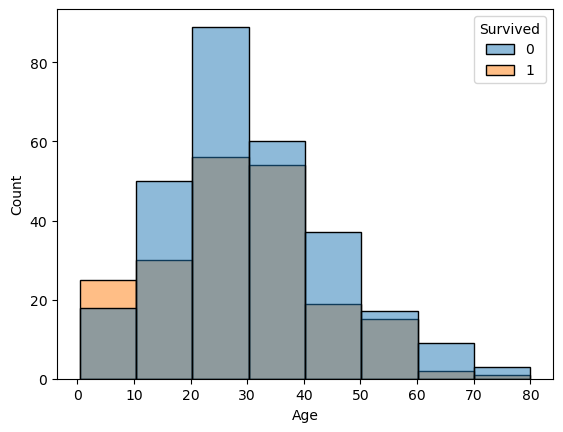

In [42]:
sns.histplot(data=real_train, x="Age", bins=8,hue="Survived")

In [62]:
real_train.Age.describe()

count    485.000000
mean      29.918722
std       14.684187
min        0.420000
25%       20.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [77]:
# Survival Rate by Age Category
def age_categorising(row):
	if (row.Age > 0 and row.Age <= 10):
		return "0_10"
	elif (row.Age > 10 and row.Age <= 20):
		return "10_20"
	elif (row.Age > 20 and row.Age <= 30):
		return "20_30" 
	elif (row.Age > 30 and row.Age <= 40):
		return "30_40" 
	elif (row.Age > 40 and row.Age <= 50):
		return "40_50" 
	elif (row.Age > 50 and row.Age <= 60):
		return "50_60" 
	elif (row.Age > 60 and row.Age <= 70):
		return "60_70"  
	elif (row.Age > 70 and row.Age <= 80):
		return "70_80" 
	elif (row.Age > 80 and row.Age <= 90):
		return "80_90" 
	else:
		return "-"

In [78]:
real_train["Age_Category"] = real_train.apply(age_categorising,axis=1)
real_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,20_30
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,-
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,-
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,50_60
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S,40_50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S,30_40
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S,40_50
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,30_40
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S,10_20


<Axes: xlabel='Age_Category', ylabel='count'>

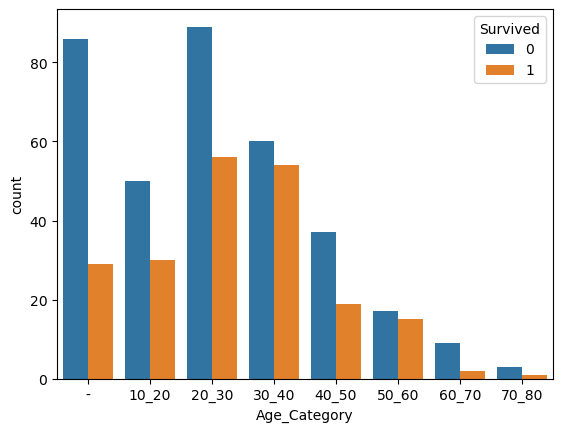

In [83]:
sns.countplot(data = real_train , x = "Age_Category" , hue = "Survived" , order = ["-","10_20","20_30","30_40","40_50","50_60","60_70","70_80"])

In [88]:
Age_Survival_Data = real_train.groupby("Age_Category").describe().Survived
Age_Survival_Data

,count,mean,std,min,25%,50%,75%,max
Age_Category,,,,,,,,
-,115.0,0.252174,0.436161,0.0,0.0,0.0,0.50,1.0
0_10,43.0,0.581395,0.499169,0.0,0.0,1.0,1.00,1.0
10_20,80.0,0.375000,0.487177,0.0,0.0,0.0,1.00,1.0
20_30,145.0,0.386207,0.488567,0.0,0.0,0.0,1.00,1.0
30_40,114.0,0.473684,0.501511,0.0,0.0,0.0,1.00,1.0
40_50,56.0,0.339286,0.477752,0.0,0.0,0.0,1.00,1.0
50_60,32.0,0.468750,0.507007,0.0,0.0,0.0,1.00,1.0
60_70,11.0,0.181818,0.404520,0.0,0.0,0.0,0.00,1.0
70_80,4.0,0.250000,0.500000,0.0,0.0,0.0,0.25,1.0


We can see from the category surivival rate mean, the age between 0 to 10 has the highest rate of survival

<Axes: xlabel='Age_Category', ylabel='mean'>

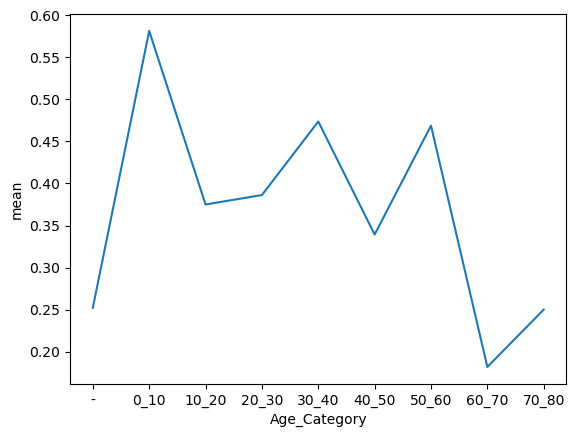

In [98]:
sns.lineplot(data = Age_Survival_Data , x = "Age_Category" , y = "mean")

# Exploring Different Model
Just playing around with different model, the one that I had learned in school (more in depth) are the below 4, so I will be trying to impelement the 4 different type. 
- K-Nearest Neighbours
- Decision Trees
- Support Vector Machines 
- Neural Networks 


## K-Nearest Neighbours (KNN)
Before performing the K-Nearest Neighbours, since the algorithms can only deal with 2D data, I will compress the data using Principal Componenet Analysis before applying KNN 

# Generating Test Result

In [37]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
